In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

env = gym.make('FrozenLake-v0')
env.render()

[2017-08-02 20:22:18,571] Making new env: FrozenLake-v0



SFFF
FHFH
FFFH
HFFG


In [8]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
learning_rate = .85

# Discount factor
dis = .99
num_episodes = 2000

# Create lists to contain total rewards and steps per spisode
rList = []

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (1 + i))
        
        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        
        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = (1 - learning_rate) * Q[state, action] \
            + learning_rate * (reward + dis * np.max(Q[new_state, :]))
        
        rAll += reward
        state = new_state
    
    rList.append(rAll)

Success rate: 0.561
Final Q-Table Values
LEFT DOWN RIGHT UP
[[  2.85976722e-01   7.10444213e-03   5.99435941e-03   4.56132242e-03]
 [  2.51371295e-04   1.81621285e-03   5.67838391e-02   3.03367546e-03]
 [  4.62685693e-03   3.31745205e-03   5.44026746e-02   2.04102476e-03]
 [  5.94076362e-04   6.13889651e-04   1.36454296e-05   3.99056955e-02]
 [  1.55448610e-01   4.45375030e-03   1.26677312e-03   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.74882909e-05   1.15774186e-11   1.63007357e-01   3.45902025e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.60228918e-03   1.90015968e-04   1.50537506e-03   5.27689347e-01]
 [  0.00000000e+00   8.14698271e-01   0.00000000e+00   0.00000000e+00]
 [  9.69284506e-01   1.05802181e-04   2.79265787e-05   6.27787355e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+0

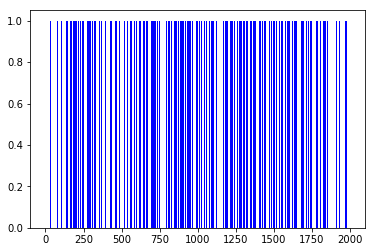

In [9]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()